In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [67]:
train = pd.read_csv('D:\\resources\\titanic\\train.csv')
test = pd.read_csv('D:\\resources\\titanic\\test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 数据清洗与特征提取

In [60]:
def get_dummies(train,test,col,columns=[]):
    train_d = pd.get_dummies(train[col])
    test_d = pd.get_dummies(test[col])
    train_d.columns = columns
    test_d.columns = columns
    train = pd.concat([train,train_d],axis=1)
    test = pd.concat([test,test_d],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train,test

### Pclass

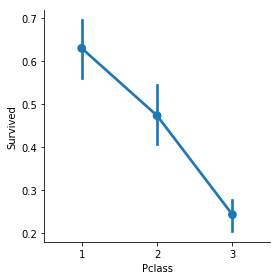

In [45]:
sns.factorplot('Pclass','Survived',data=train)
#仓位影响比较大，保留者3个特征

In [68]:
train_P,test_P = get_dummies(train,test,'Pclass',['P1','P2','P3'])
train_P.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P1,P2,P3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


### Name
提取name Title

In [75]:
#Handle Name Title
def handleNameTitle(data):
    data['NT'] = data['Name'].apply(lambda x: "".join(re.findall(',([^\.]*)\.',x)).strip())
    del data['Name']
    return data
train_N = handleNameTitle(train_P)
test_N = handleNameTitle(test_P)

rare_fre = ['Capt','Col','Don','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir','the Countess']

KeyError: 'Name'

In [79]:
train_N[train_N['NT'] in rare_fre]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [24]:
#Handle Name Title
def handleNameTitle(data):
    data['NT'] = data['Name'].apply(lambda x: "".join(re.findall(',([^\.]*)\.',x)).strip())
    del data['Name']
    return data
train = handleNameTitle(train)
test = handleNameTitle(test)

In [73]:
train_N.groupby(by='NT').apply(lambda x:x.NT.count())

NT
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
dtype: int64

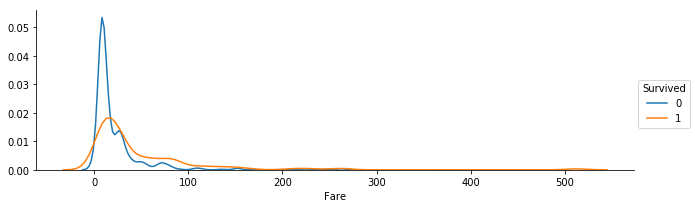

In [43]:
f = sns.FacetGrid(data=train,hue='Survived',aspect=3)
f.map(sns.kdeplot,'Fare').add_legend()